In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

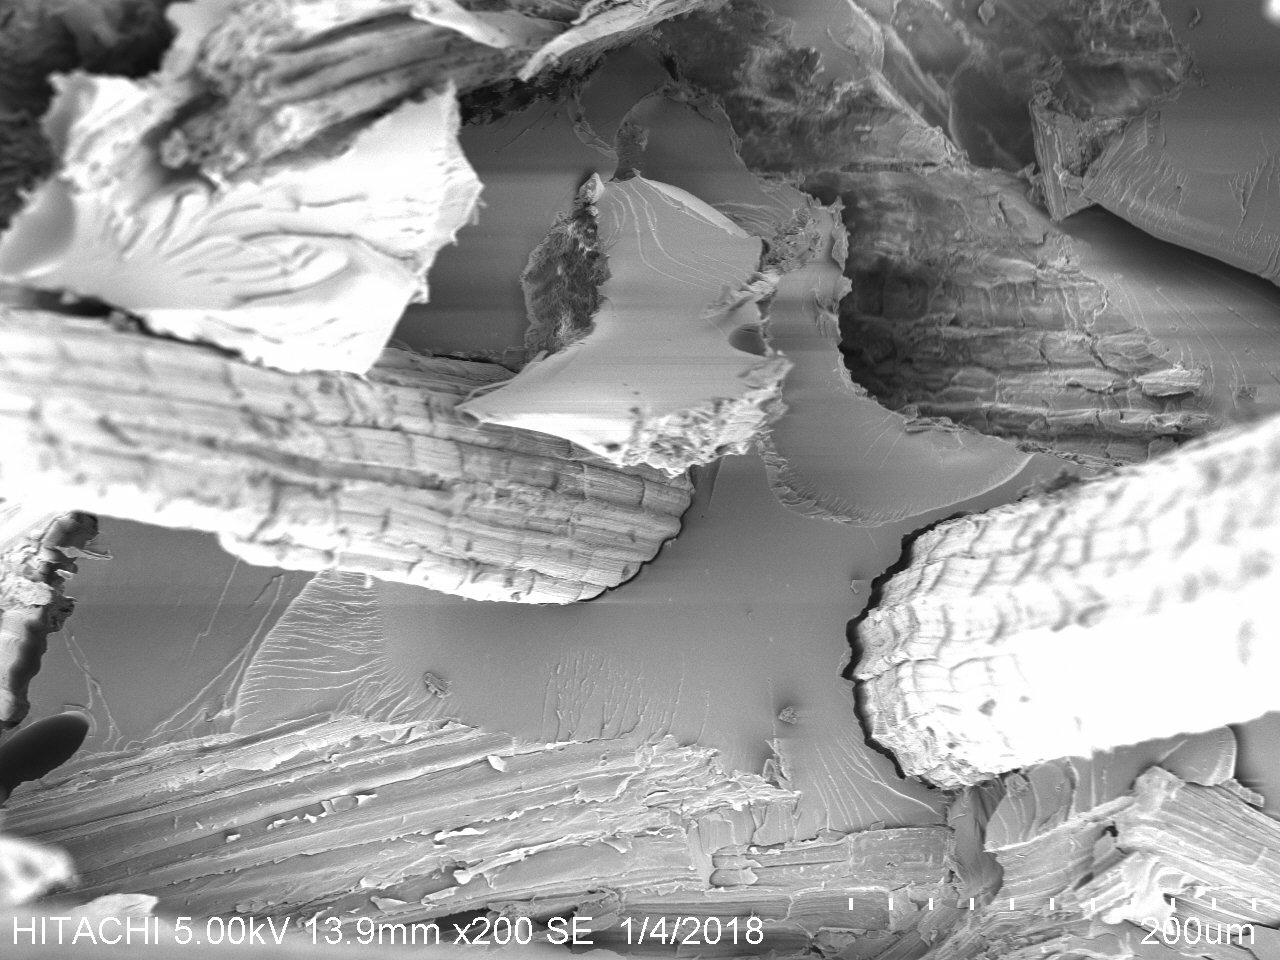

In [83]:
imgil="testt3.jpg"
im = Image.open(imgil, "r")
pix_val = list(im.getdata())
im

274
COLOR_BGR2HLS


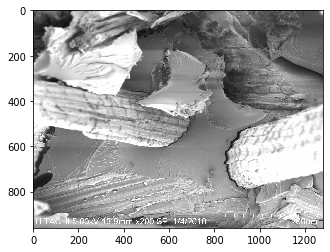

In [84]:
flags = [i for i in dir(cv2) if i.startswith("COLOR_")]
print(len(flags))
print(flags[40])
img= cv2.imread(imgil)
plt.imshow(img)
plt.show()


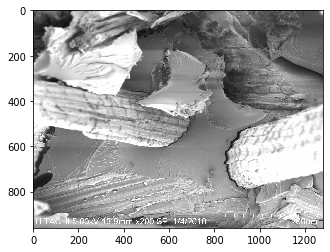

In [85]:
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.show()

In [86]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

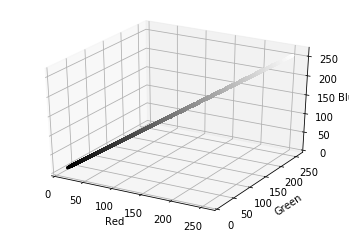

In [87]:
r, g, b = cv2.split(img2)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = img2.reshape((np.shape(img2)[0]*np.shape(img2)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

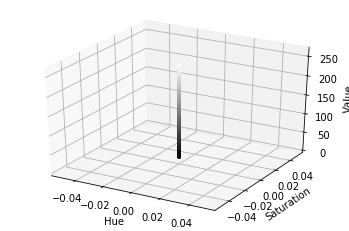

In [88]:
#now for hue and satur
hsv_img = cv2.cvtColor(img2, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv_img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()# it is used only for color images

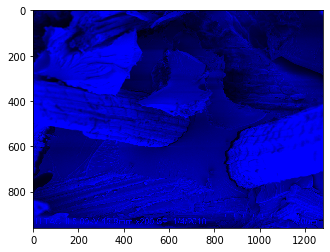

In [89]:
plt.imshow(hsv_img)

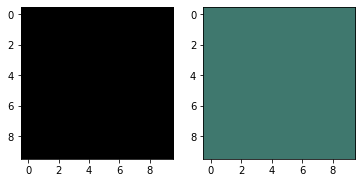

In [90]:
from matplotlib.colors import hsv_to_rgb
#displaying colours choosen
black=(0,0,0)
x=120
lblack=(x,x,x)
lo_square = np.full((10, 10, 3), lblack, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), black, dtype=np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

In [91]:
mask = cv2.inRange(img2, black, lblack)
result = cv2.bitwise_and(img2, img2, mask=mask)

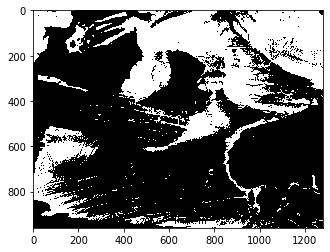

In [92]:

plt.subplot(1, 1, 1)
plt.imshow(result)
plt.imshow(mask, cmap="gray")
plt.show()